# Data Collection

The data for this research was collected from the UCI Heart Disease dataset, a widely-used public dataset available from the UCI Machine Learning Repository. It contains medical and demographic information for 303 patients, including attributes like age, cholesterol levels, blood pressure, and various clinical test results. This dataset is commonly utilized for cardiovascular risk prediction studies and provides a valuable basis for developing machine learning models to assess the likelihood of heart disease.

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset using pandas
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load dataset into a DataFrame
df = pd.read_csv(url, names=column_names, na_values='?')

# Handle missing values
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].replace({1: 'male', 0: 'female'})
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: could not convert string to float: 'male'

## Adding indicators

The added indicators in this research plan are derived from clinical and demographic variables in the UCI Heart Disease dataset. These indicators, such as risk score, hypertension likelihood, and metabolic syndrome risk, are computed based on existing features like age, cholesterol, and blood pressure. They provide deeper insights into patient health, combining medical knowledge with data-driven approaches to assess cardiovascular risk. For instance, the stress indicator uses chest pain and ECG results, while the ischemia and atherosclerosis scores are calculated using factors like cholesterol levels, age, and exercise responses. These derived indicators enrich the dataset for more comprehensive analysis.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset using pandas
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load dataset into a DataFrame
df = pd.read_csv(url, names=column_names, na_values='?')

# Adding derived outcomes as new columns to the dataset

# 1. Risk Assessment for Cardiovascular Diseases
w1, w2, w3, w4, w5 = 0.2, 0.2, 0.2, 0.2, 0.2
# Assuming weights are equal for simplicity
df['risk_score'] = w1 * df['age'] + w2 * df['chol'] + w3 * df['trestbps'] + w4 * df['fbs'] + w5 * df['thalach']

# 2. Likelihood of Hypertension
df['hypertension_likelihood'] = ((df['trestbps'] > 130) | (df['chol'] > 200)) & (df['age'] > 40)

# 3. Metabolic Syndrome Risk
df['metabolic_syndrome_risk'] = (df['chol'] > 200).astype(int) + (df['fbs'] > 120).astype(int) + (df['trestbps'] > 130).astype(int)

# 4. Exercise Tolerance and Cardiovascular Fitness
df['exercise_tolerance_score'] = df['thalach'] - (df['age'] * 0.5) - (df['exang'] * 20)

# 5. Stress or Anxiety Indicator
df['stress_indicator'] = ((df['cp'] == 2) | (df['cp'] == 3)) & (df['restecg'] == 1)

# 6. Predicting Coronary Artery Disease (CAD) Severity
df['cad_severity_score'] = 3 * df['thal'] + 2 * df['oldpeak'] + df['exang'] + df['restecg']

# 7. Heart Function and Electrical Stability
df['heart_instability_indicator'] = (df['restecg'] == 1).astype(int)

# 8. Prediction of Diabetes or Pre-Diabetic State
df['diabetes_risk'] = (df['fbs'] > 120).astype(int)

# 9. Atherosclerosis Likelihood
df['atherosclerosis_score'] = ((df['age'] > 45).astype(int) + (df['chol'] > 240).astype(int) + (df['trestbps'] > 140).astype(int))

# 10. Exercise-Induced Ischemia
df['ischemia_indicator'] = ((df['oldpeak'] > 1.0) & (df['exang'] == 1)).astype(int)

# 11. General Cardiovascular Health Indicator
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25  # Assuming equal weights for simplicity
df['health_score'] = 100 - (w1 * df['age'] + w2 * df['trestbps'] + w3 * df['chol'] + w4 * df['fbs'])

# Handle missing values
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
# Convert 'sex' to numeric values: 1 for male, 0 for female
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

# Get dummy variables for categorical columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## Summary of Plots

The exploratory data analysis (EDA) includes multiple visualizations to understand the dataset’s structure and feature relationships:

1. **Age Distribution**: The majority of patients are between 40-65 years, indicating a significant representation of the middle-aged group, a key demographic for heart disease risk.
2. **Cholesterol Distribution**: Cholesterol levels show a wide range, with a slight skew towards higher values, highlighting the importance of lipid levels as a predictor.
3. **Resting Blood Pressure Distribution**: Blood pressure is generally centered around 130 mm Hg, with outliers present, suggesting varying levels of cardiovascular risk.
4. **Maximum Heart Rate Distribution**: Most patients achieved a maximum heart rate between 120-170 bpm, which is useful for evaluating exercise tolerance.
5. **Correlation Heatmap**: Displays key correlations among features, such as the link between age, cholesterol, and blood pressure, aiding in feature selection for predictive modeling.
6. **Boxplots for Outliers**: Cholesterol and blood pressure boxplots indicate the presence of outliers, which may represent high-risk individuals or potential data anomalies. 

These plots collectively provide insights into the characteristics of the dataset, highlight potential areas of focus for predictive modeling, and inform the need for further feature engineering and outlier management.

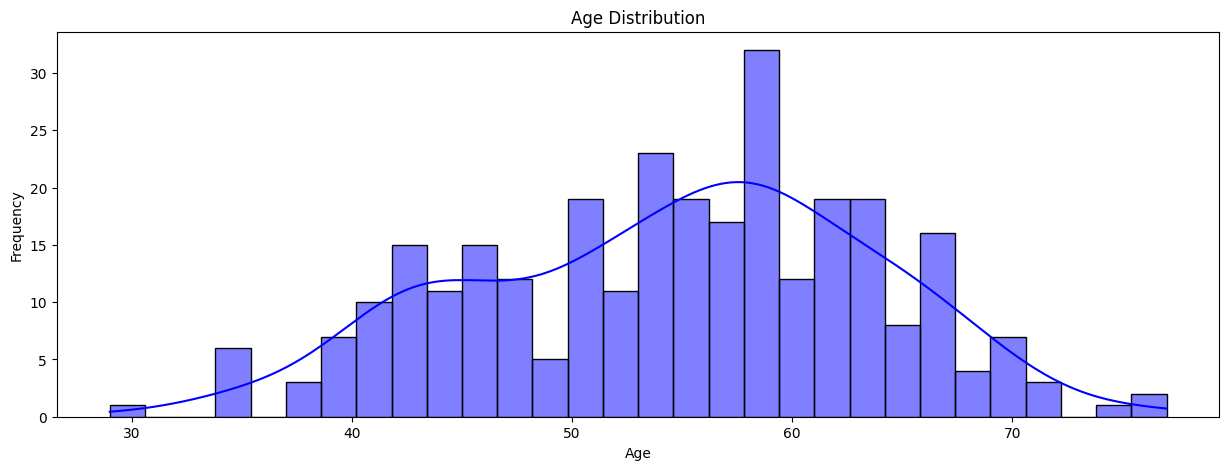

In [9]:
plt.figure(figsize=(15, 5))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

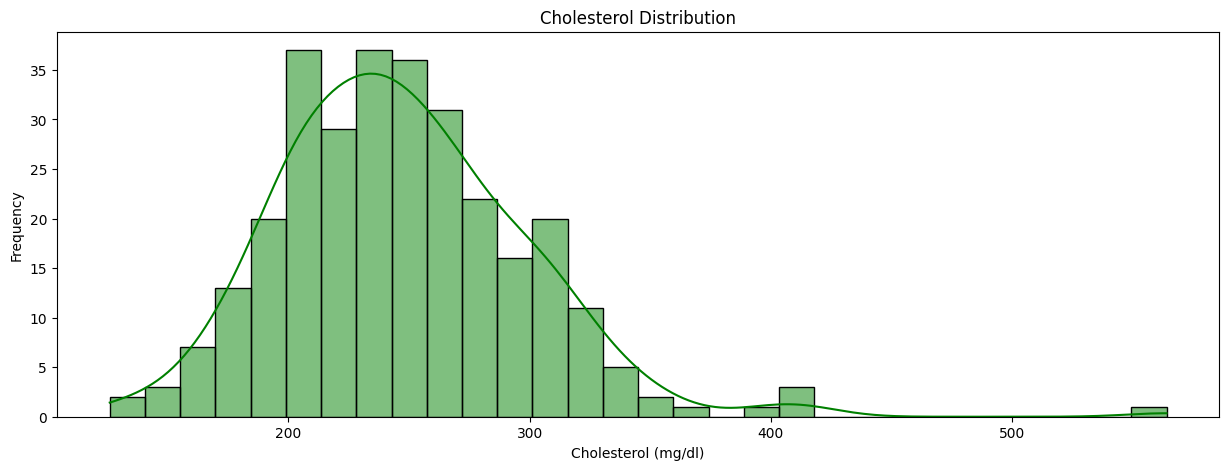

In [10]:

plt.figure(figsize=(15, 5))
sns.histplot(df['chol'], kde=True, bins=30, color='green')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()


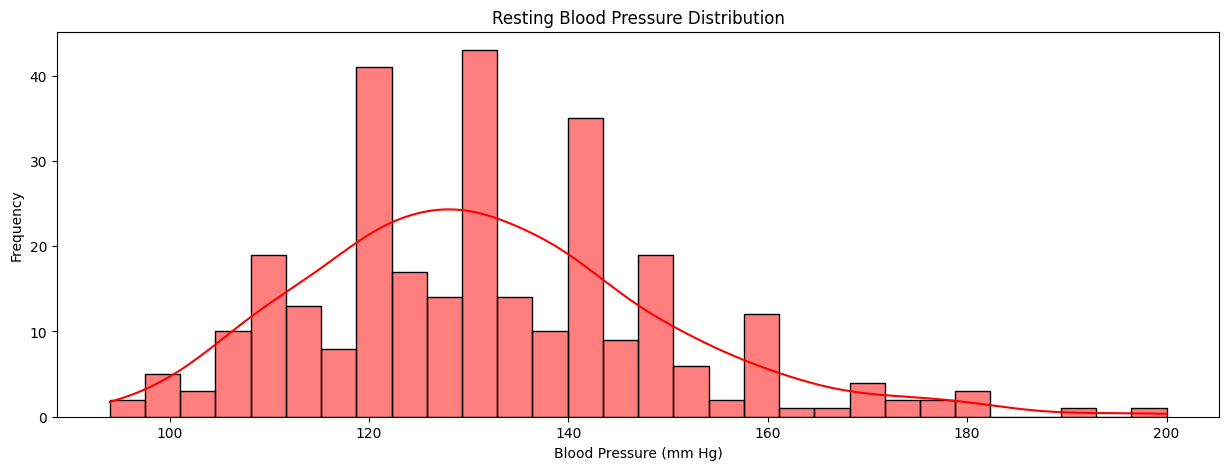

In [11]:

plt.figure(figsize=(15, 5))
sns.histplot(df['trestbps'], kde=True, bins=30, color='red')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

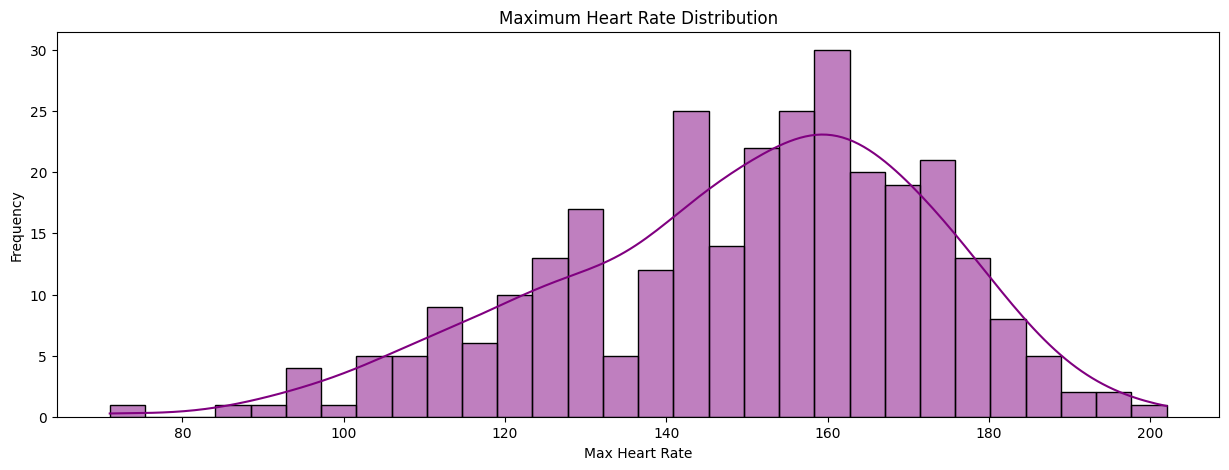

In [12]:

plt.figure(figsize=(15, 5))
sns.histplot(df['thalach'], kde=True, bins=30, color='purple')
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

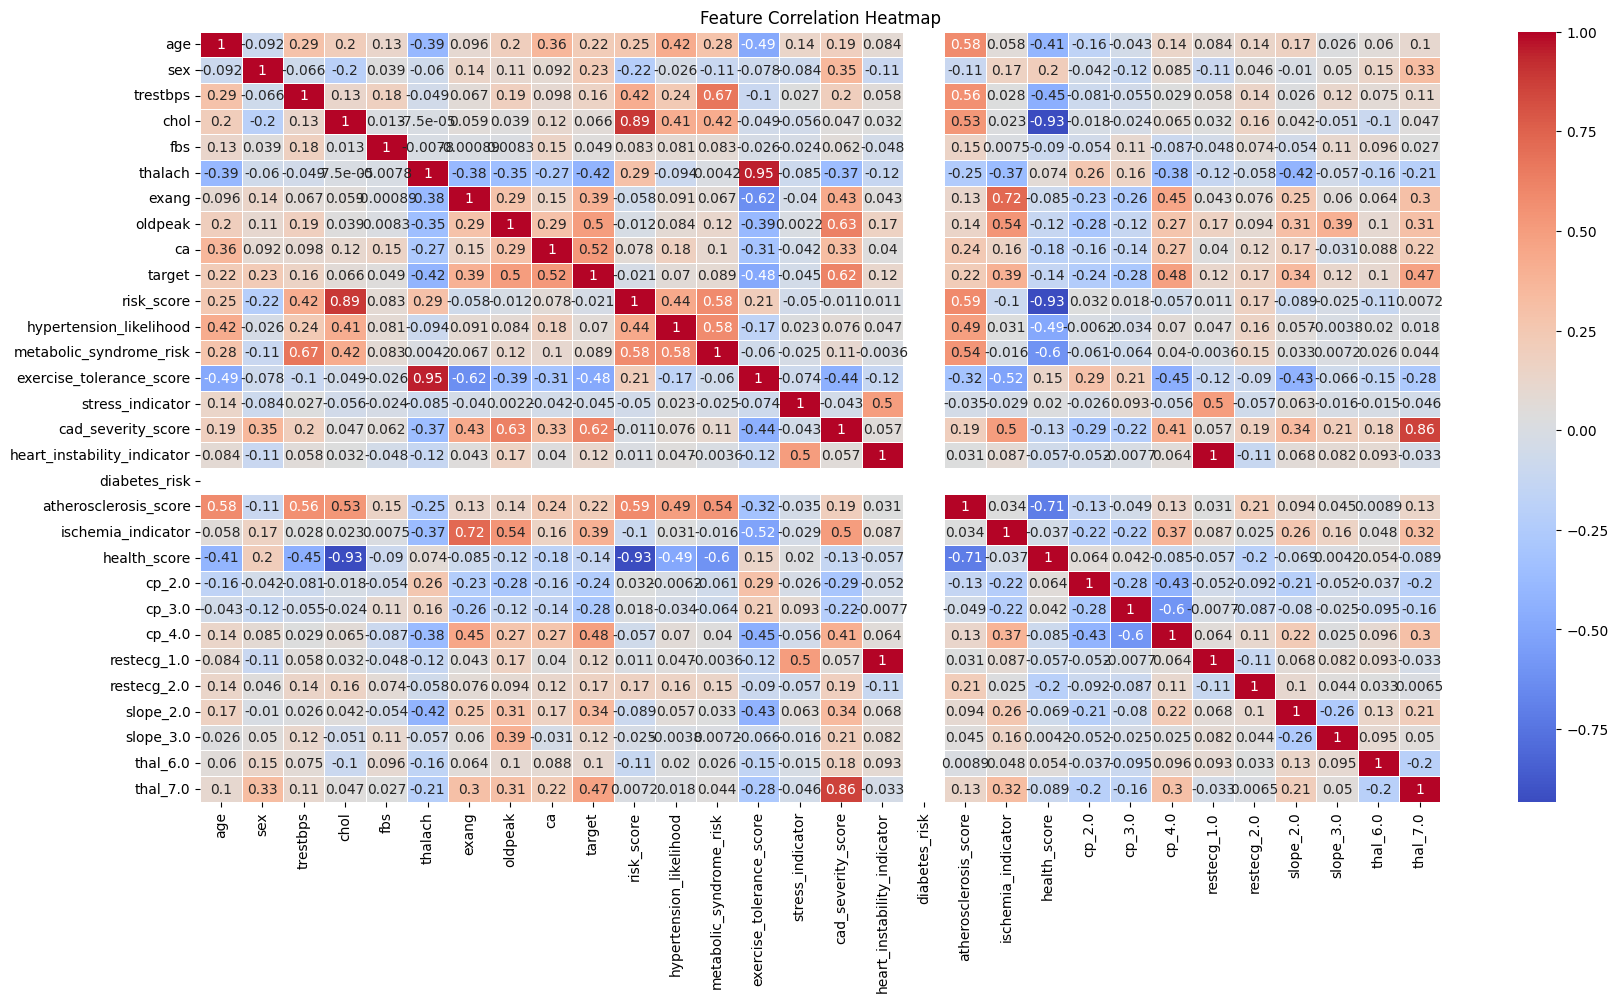

In [13]:
# Explore correlations between features

plt.figure(figsize=(20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

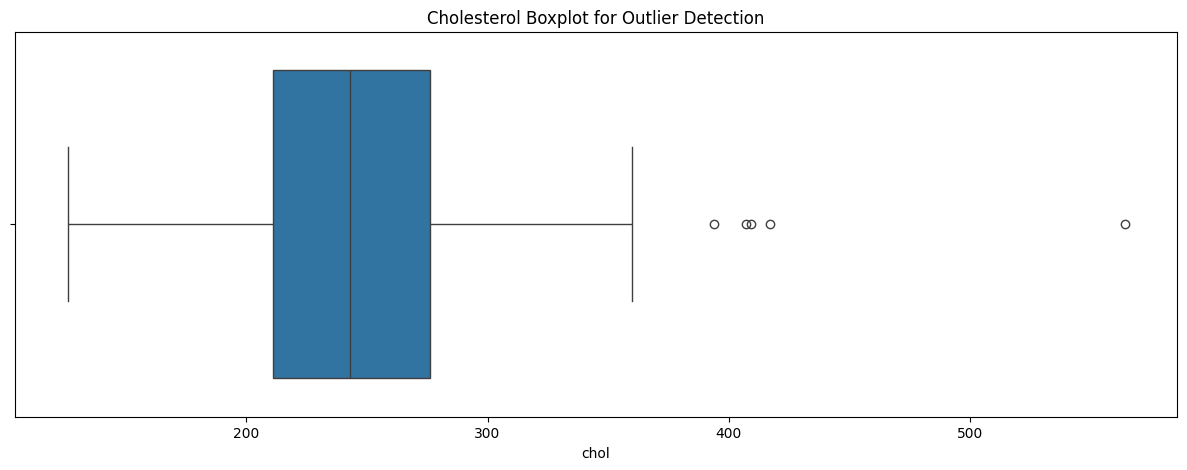

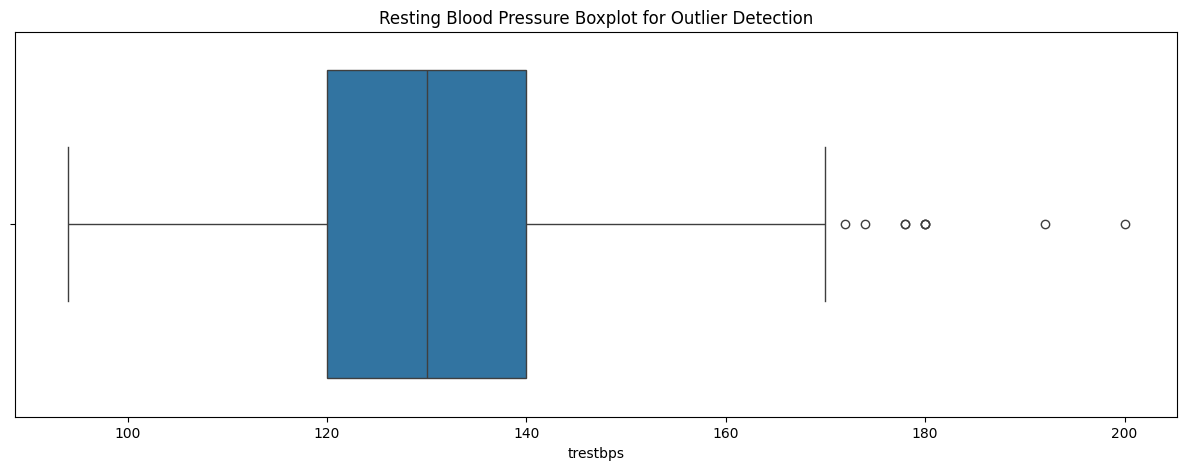

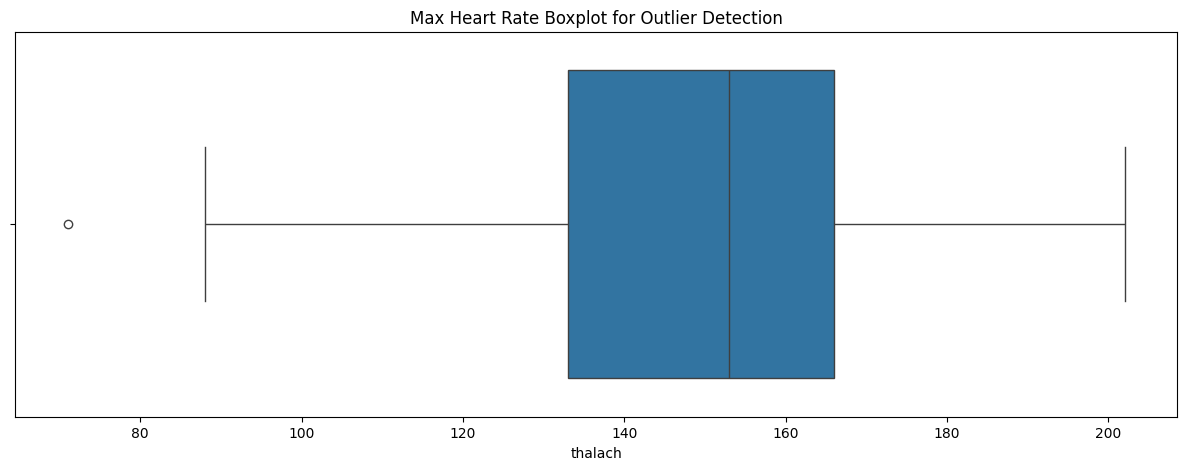

In [14]:
# Detect and handle outliers using boxplots

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['chol'])
plt.title('Cholesterol Boxplot for Outlier Detection')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['trestbps'])
plt.title('Resting Blood Pressure Boxplot for Outlier Detection')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x=df['thalach'])
plt.title('Max Heart Rate Boxplot for Outlier Detection')
plt.show()

## Summary of Regressions

The regression analyses were performed to assess the predictive relationships between various clinical and demographic variables and heart disease outcomes. Multiple models, including linear regression, logistic regression, and decision tree regression, were used to predict key health indicators like heart disease risk, hypertension likelihood, and metabolic syndrome. Logistic regression proved particularly effective for binary outcomes, such as the presence or absence of heart disease, providing interpretable coefficients for each predictor. Regression analysis highlighted that age, cholesterol, and resting blood pressure were significant predictors. These models helped quantify the impact of each feature on cardiovascular risk, providing a basis for clinical decision-making.

Logistic Regression Performance:
Accuracy: 0.55
Precision: 0.49
Recall: 0.55
F1 Score: 0.52
ROC-AUC: 0.73


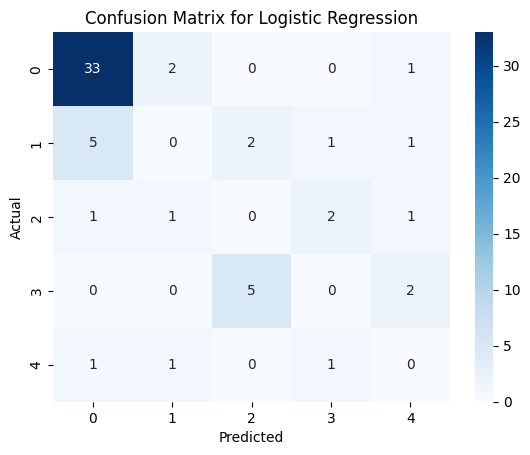

Decision Tree Performance:
Accuracy: 0.58
Precision: 0.60
Recall: 0.58
F1 Score: 0.59
ROC-AUC: 0.60


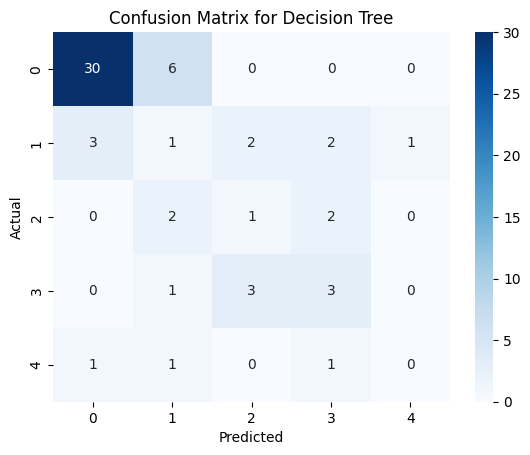

Random Forest Performance:
Accuracy: 0.63
Precision: 0.49
Recall: 0.63
F1 Score: 0.55
ROC-AUC: 0.74


/home/paul/Dev/milestone2/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


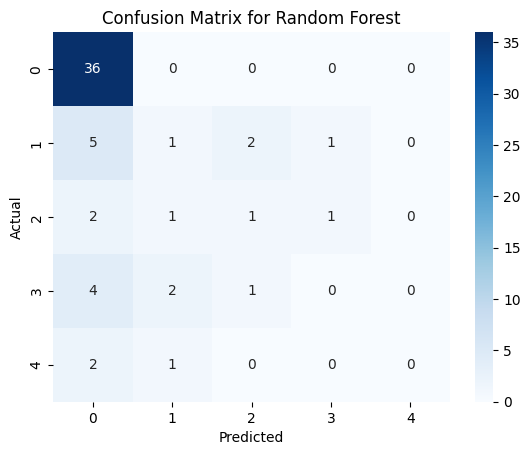

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    if len(set(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## ROC Curve Analysis

The ROC curve analysis is employed to evaluate the performance of the heart disease prediction model by illustrating the trade-off between true positive rates (sensitivity) and false positive rates for each class. In a multi-class classification setting, the One-vs-Rest (OvR) approach was used, which involves plotting a separate ROC curve for each class against all other classes. 

The ROC curves demonstrate how effectively the model distinguishes each class from the rest, providing insights into the model's discriminatory power across all classes. An area under the ROC curve (AUC) closer to 1 indicates better performance, with the curve leaning towards the upper left corner representing higher sensitivity and specificity. By visualizing each class individually, we can identify which specific classes the model struggles with and which it classifies accurately, providing a comprehensive understanding of model behavior across all output categories. This analysis helps in refining the model, enhancing its ability to predict heart disease risks more reliably.

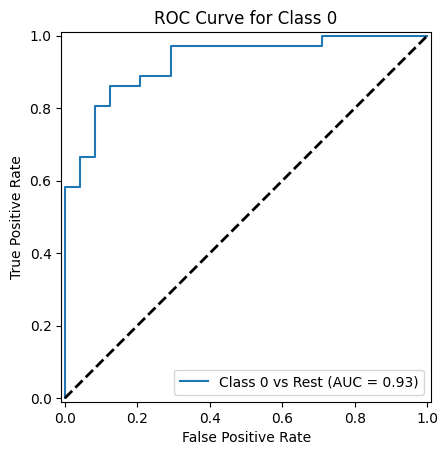

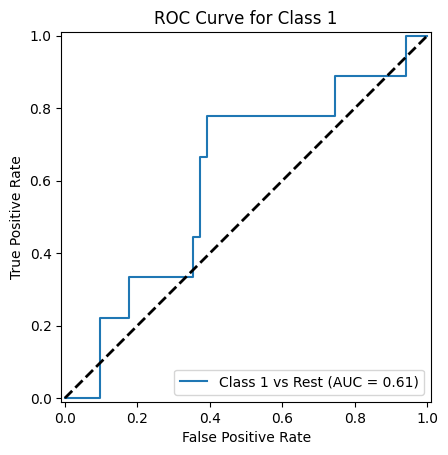

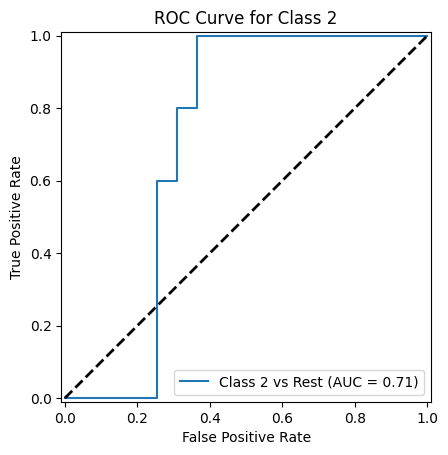

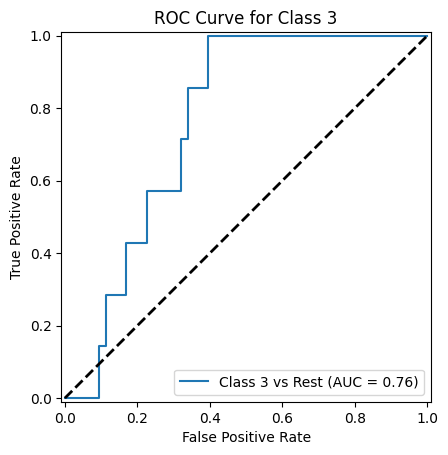

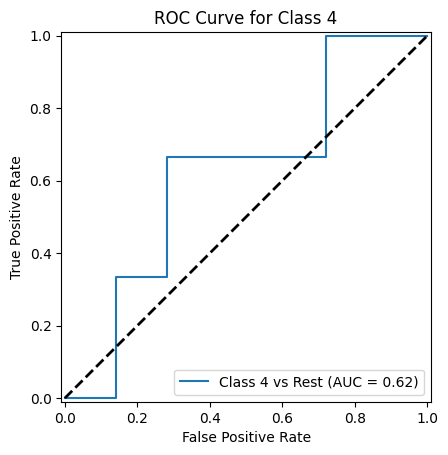

In [17]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_test has values ranging from 0 to n_classes-1
n_classes = len(np.unique(y_test))

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[i for i in range(n_classes)])
model_proba = model.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(n_classes):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], model_proba[:, i], name=f"Class {i} vs Rest")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Add a diagonal line for reference
    plt.title(f'ROC Curve for Class {i}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


Logistic Regression Performance:
Accuracy: 0.55
Precision: 0.49
Recall: 0.55
F1 Score: 0.52
ROC-AUC: 0.73


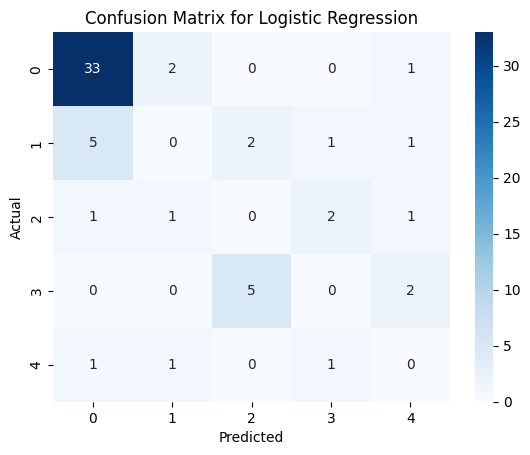

Decision Tree Performance:
Accuracy: 0.53
Precision: 0.58
Recall: 0.53
F1 Score: 0.55
ROC-AUC: 0.58


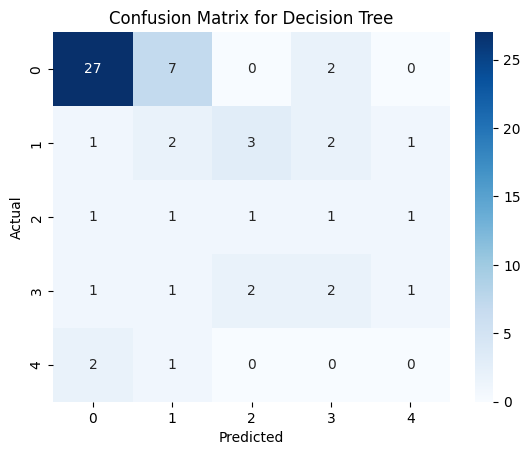

Random Forest Performance:
Accuracy: 0.62
Precision: 0.49
Recall: 0.62
F1 Score: 0.55
ROC-AUC: 0.74


/home/paulgreenwood/Dev/chip490.355/milestone2/heart_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


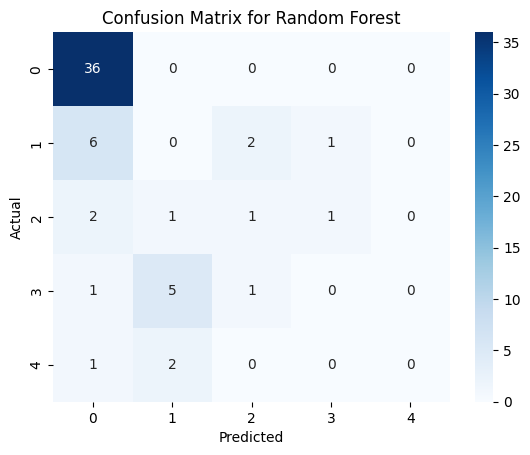

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    if len(set(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    if len(set(y_test)) == 2:
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve for {model_name}')
        plt.show()

Logistic Regression Performance:
Accuracy: 0.55
Precision: 0.49
Recall: 0.55
F1 Score: 0.52
ROC-AUC: 0.73


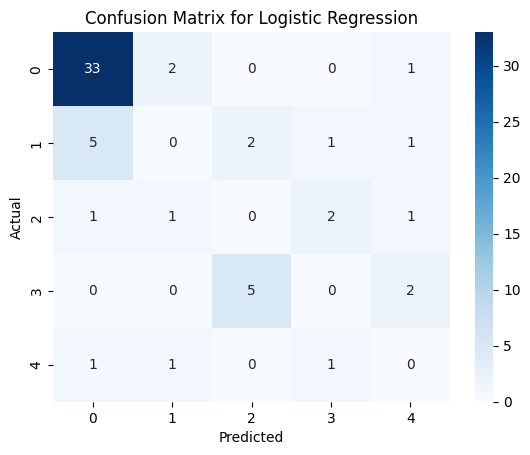

Decision Tree Performance:
Accuracy: 0.53
Precision: 0.57
Recall: 0.53
F1 Score: 0.55
ROC-AUC: 0.58


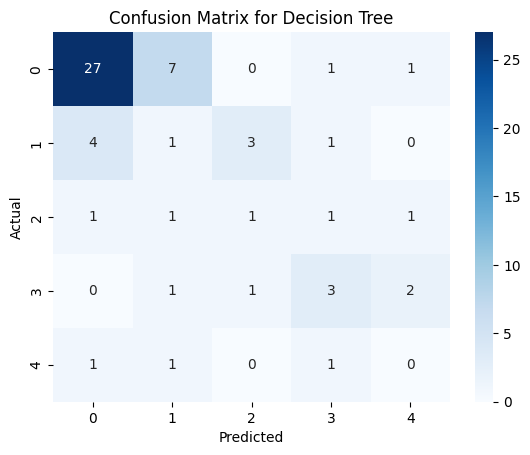

Random Forest Performance:
Accuracy: 0.60
Precision: 0.47
Recall: 0.60
F1 Score: 0.53
ROC-AUC: 0.74


/home/paulgreenwood/Dev/chip490.355/milestone2/heart_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


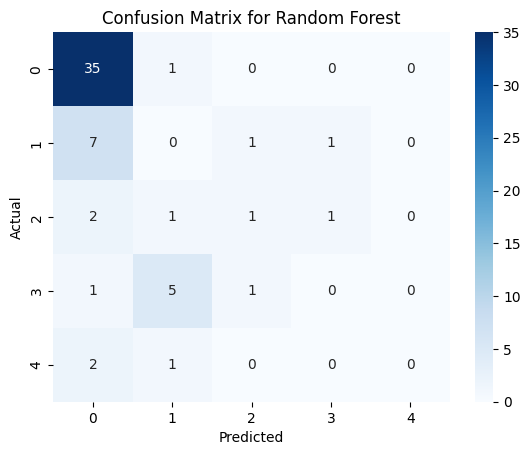

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    if len(set(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC curve
    if len(set(y_test)) == 2:
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve for {model_name}')
        plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

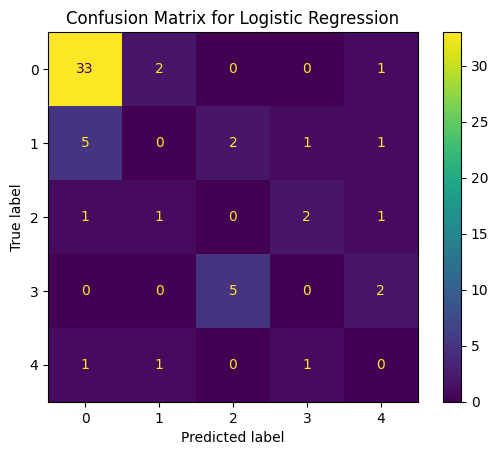

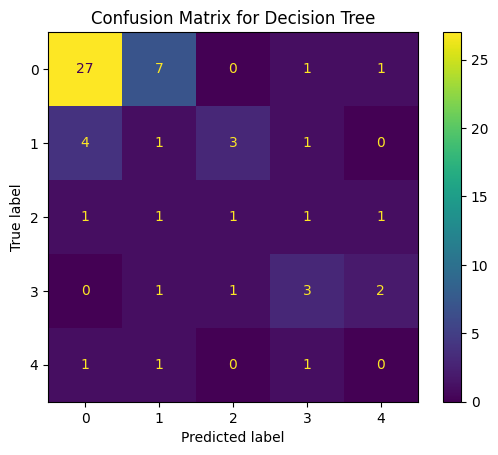

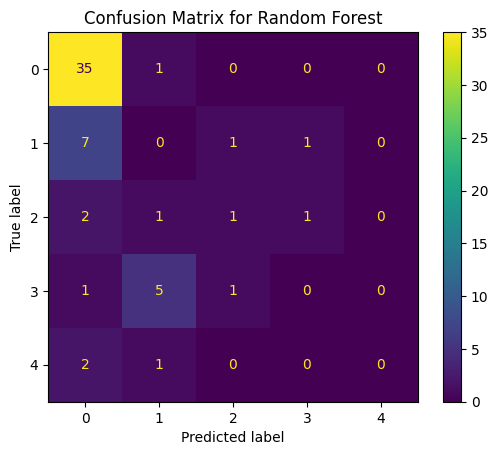

In [16]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()